<a href="https://colab.research.google.com/github/inuin09/Natural-language-Processing/blob/main/%EB%B9%88%EB%8F%84%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#관련 설치
!apt-get update
!apt-get install g++ openjdk-8-jdk
!pip install JPype1
!pip install rhinoMorph
import rhinoMorph
rn = rhinoMorph.startRhino() 

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [1]:
#그래프를 그릴때 한글이 잘 보이도록 하는 코드.

import matplotlib as mpl
import matplotlib.pyplot as plt

%config lnlineBackend.figure_foment = 'retina'  #폰트가 깨끗하게 보이도록 설정
!apt install fonts-nanum  #나눔 폰트 설치

import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
font = fm.FontProperties(fname = fontpath, size = 9)

#기본 글꼴 변경
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumMyeongjo')

#런 하고, 런타임 다시 시작하기, 다시 여기서부터 시작.

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 76 not upgraded.


In [4]:
#파일이 있는 곳으로 경로를 변경한다.
%cd/content/gdrive/My\ Drive/pytest/

/content/gdrive/My Drive/pytest


In [5]:
! ls  #파일의 리스트 보여주기

네이버뉴스-생활문화_다중  iris.csv	pytest_position.png  test.csv
aclImdb_v1_small	  kor-eng	ratings_morphed.txt  윤동주시.txt
alice.png		  negative.txt	ratings_small.txt    김소월시.txt
fra-eng			  positive.txt	similarity	     wiki_test.txt


In [6]:
#데이터 로딩
def read_data(filename, encoding='cp949'):  #읽기 함수 정의 , cp949 ??
  with open(filename, 'r', encoding=encoding) as f:
    data = [line.split('\t') for line in f.read().splitlines()]  
    #txt 파일의 헤더(id document label)는 제외하기
    #문장 분리-> 각 문장에서 탭 부분 분리 -> 리스트 생성 ->전체로는 중첩 리스트
    data=data[1:]
  return data

def write_data(data, filename, encoding='cp949'):  #쓰기 함수도 정의 
  with open(filename, 'w', encoding=encoding) as f:
    f.write(data)

data = read_data('ratings_small.txt', encoding='cp949')  #전체 파일은 ratings.txt

In [7]:
#데이터 확인
print(len(data))
print(len(data[0]))
print(data[0])
print(data[0:3])

500
3
['8112052', '어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '1']
[['8112052', '어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '1'], ['8132799', '"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다."', '1'], ['4655635', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '1']]


In [8]:
#샘플 데이터 분석 연습
import rhinoMorph
rn = rhinoMorph.startRhino()

sample_data = rhinoMorph.onlyMorph_list(rn, data[0][1], pos=['NNG','NNP','VV','VA','XR','IC','MM','MAG','MAJ'],eomi=True)

print('sample data : ', sample_data)  #형태소 분석결과
print('joined sample data :', ' '.join(sample_data))  #문자열을 공백으로 연결한다. -> 영어와 굉장히 유사한 모양으로 만들기 위해서 사용함.

filepath:  /usr/local/lib/python3.7/dist-packages
classpath:  /usr/local/lib/python3.7/dist-packages/rhinoMorph/lib/rhino.jar
JVM is already started~
RHINO started!
sample data :  ['어리다', '때', '보다', '지금', '다시', '보다', '재미있다', 'ㅋㅋ']
joined sample data : 어리다 때 보다 지금 다시 보다 재미있다 ㅋㅋ


In [9]:
#전체 데이터 형태소 분석
morphed_data = ''

for data_each in data:
  morphed_data_each = rhinoMorph.onlyMorph_list(rn, data_each[1], pos=['NNG','NNP','VV','VA','XR','IC','MM','MAG','MAJ'], eomi=True)
  joined_data_each = ' '.join(morphed_data_each)
  if joined_data_each:
    morphed_data += data_each[0]+'\t'+joined_data_each+'\t'+data_each[2]+'\n'

#형태소 분석된 파일 저장
write_data(morphed_data, 'ratings_morphed.txt', encoding='cp949')

In [ ]:
print(morphed_data)

In [12]:
#데이터 본문 출력
data = read_data('ratings_morphed.txt', encoding='cp949')
print(len(data))
print(len(data[0]))

data_txt = [line[1] for line in data] #데이터 본문
data_senti = [line[2] for line in data]  #데이터 긍부정 부분(1은 긍정, 0은 부정)

494
3


In [19]:
#Counter연습
#Counter는 리스트의 구성요소를 종류별로 빈도 계산함.
from collections import Counter

count=Counter(['여름','과일','딸기','과일','딸기'])  
result = count.most_common(2)  #count의 요소를 세어 최빈값 2를 반환한다. 리스트에 담긴 튜플 형태로

#.most_common() : 주어진 데이터에서 가장 많이 나타난 n개의 요소를 나타낸다.

print(result)
print(result[0])
print(result[0][0])  #0번째 요소의 0번째
print(result[0][1])

[('과일', 2), ('딸기', 2)]
('과일', 2)
과일
2


In [16]:
#분석된 데이터 빈도 구하기
mergedText = ' '.join(data_txt)  #공백을 추가하며 일단 모든 리스트 요소들을 결합
print('mergedText :', mergedText)

mergedText : 디자인 배우다 학생 외국 디자이너 일구다 전통 통하다 발전 문화 산업 부럽다 사실 우리나라 그 어렵다 시절 끝 열정 지키다 노라노 같다 전통 있다 같다 사람 꿈 꾸다 이루다 나가다 있다 감사 폴리스스토리 시리즈 뉴 없다 최고 와 연기 진짜 쩔다 지루 생각하다 몰입 그래 이런 진짜 영화 안개 자욱 하다 밤하늘 뜨다 초승달 같다 영화 사랑 해보다 사람 처음 끝 웃다 있다 영화 완전 감동 다시다 감동 개들 전쟁 나오다 나오다 1빠 보다 굿 바보 병 나이 같다 영화 지금 보다 감동적 하지만 훗날 다시 보다 대사 하나하나 그 감정 완벽 하다 이해하다 같다 재미있다 고질라 무 귀엽다 ㅋㅋ 영화 오페라 작품 극단적 평 갈리다 어쩌다 없다 반전 좋다 ^^ 평점 왜 낮다 긴장감 스릴감 진짜 최고 진짜 전장 느끼다 공포 생생 전하다 네고시에이터 소재 같다 아무런 관련 없다 단연 최고 가다 갈수록 더욱 빠지다 밀회 화이팅 어 생각 없이 보다 상당 하다 수작 일본 영화 최고 마음 강렬 임팩트 일품 오랜만 보다 제대로 되다 범죄 스릴러 그런 때가다 있다 사랑하다 도 그저 좋아하다 마디 말 꺼내다 벅차다 밤 잠 설치다 때 교복 남다 션 자 볼펜 자국 역시 미처 다 전하다 못하다 마음 형태 마지막 씬 잊다 없다 강압적 용서 세뇌 용서 대하다 비판 중세 시대 명작 굿 평점 왜 이러하다 시간 영상 존재 죽기 전 꼭 한번 보다 아름답다 슬프다 제니퍼 코넬리 눈부시다 아역 시절 로버트 드니로 마지막 웃다 장면 정말 가슴속 영원히 기억 되다 최고 명작 사람 어떻하다 저런 짓 하다 있다 는지 ㅡㅡ 보다 다 화나다 인간 잠재 되다 악마 여러 시간 공간 속 존속 이 다큐 엉뚱 광적 재현 최고 일 동안 쉬다 틈틈이 잠 줄이다 여운 남다 실화 더욱 충격 다시 일어나다 서다 안되다 경각심 일깨우다 영화 존 그라다 샴 작품 한 보다 가치 있다 농아 인문 대하다 알다 때 재미있다 ㅋㅋ 이정재 이범수 ㅋㅋ ㅋㅋ 친구 우정 매우 감동적 굿 굿 굿 또 해라 또 하다 제발 ㅠㅠ 아 재미있다 이

In [20]:
mergedTextList = mergedText.split(' ')  #결합된 요소들을 공백 단위로 분리하여 하나의 리스트로 만든다.
print('mergedTextList :', mergedTextList)

mergedTextList : ['디자인', '배우다', '학생', '외국', '디자이너', '일구다', '전통', '통하다', '발전', '문화', '산업', '부럽다', '사실', '우리나라', '그', '어렵다', '시절', '끝', '열정', '지키다', '노라노', '같다', '전통', '있다', '같다', '사람', '꿈', '꾸다', '이루다', '나가다', '있다', '감사', '폴리스스토리', '시리즈', '뉴', '없다', '최고', '와', '연기', '진짜', '쩔다', '지루', '생각하다', '몰입', '그래', '이런', '진짜', '영화', '안개', '자욱', '하다', '밤하늘', '뜨다', '초승달', '같다', '영화', '사랑', '해보다', '사람', '처음', '끝', '웃다', '있다', '영화', '완전', '감동', '다시다', '감동', '개들', '전쟁', '나오다', '나오다', '1빠', '보다', '굿', '바보', '병', '나이', '같다', '영화', '지금', '보다', '감동적', '하지만', '훗날', '다시', '보다', '대사', '하나하나', '그', '감정', '완벽', '하다', '이해하다', '같다', '재미있다', '고질라', '무', '귀엽다', 'ㅋㅋ', '영화', '오페라', '작품', '극단적', '평', '갈리다', '어쩌다', '없다', '반전', '좋다', '^^', '평점', '왜', '낮다', '긴장감', '스릴감', '진짜', '최고', '진짜', '전장', '느끼다', '공포', '생생', '전하다', '네고시에이터', '소재', '같다', '아무런', '관련', '없다', '단연', '최고', '가다', '갈수록', '더욱', '빠지다', '밀회', '화이팅', '어', '생각', '없이', '보다', '상당', '하다', '수작', '일본', '영화', '최고', '마음', '강렬', '임팩트', '일품', '오랜만', '보다', '제대로', '되다', '범죄

In [21]:
wordinfo = Counter(mergedTextList)  #하나의 리스트로 묶인 분리된 요소를 카운트함. (내림차순)
print('wordinfo :',wordinfo)

wordinfo : Counter({'영화': 173, '보다': 127, '하다': 96, '없다': 67, 'ㅋㅋ': 60, '정말': 47, '너무': 47, '있다': 44, '좋다': 41, '재미있다': 35, '되다': 34, '진짜': 32, '연기': 30, '같다': 27, '만들다': 27, '왜': 26, '다': 26, '최고': 25, 'ㅋ': 25, '잘': 24, '나오다': 23, '사람': 21, '아깝다': 21, '때': 20, '안': 19, '감동': 18, '평점': 17, '모르다': 17, '이': 16, '재미': 16, '이런': 15, '말': 15, '드라마': 15, '알다': 14, '그': 13, 'ㅠ': 13, '한국': 13, '스토리': 13, '재미없다': 13, '다시': 12, '^^': 12, '생각': 12, '시간': 12, '내용': 12, '못': 12, '말다': 12, '더': 12, '주다': 12, '마음': 11, 'ㅠㅠ': 11, '감독': 11, '이쁘다': 11, '대하다': 10, '명작': 10, '아': 10, '내내': 10, 'ㅎㅎ': 10, '처음': 9, '지금': 9, '가다': 9, '그런': 9, '좋아하다': 9, '전': 9, 'ㅡㅡ': 9, '웃기다': 9, '주인공': 9, '돈': 9, '지루': 8, '완전': 8, '굿': 8, '작품': 8, '장면': 8, '남자': 8, '액션': 8, '무슨': 8, '수': 8, '많다': 8, '원작': 8, '10점': 8, '최악': 8, '배우다': 7, '끝': 7, '와': 7, '일본': 7, '그렇다': 7, '그냥': 7, 'ㅎ': 7, '받다': 7, '인생': 7, '쓰레기': 7, '참': 7, '짱': 7, '잼': 7, '들다': 7, '답답': 7, '사실': 6, '생각하다': 6, '웃다': 6, '공포': 6, '소재': 6, '빠지다': 6, '역시': 6, '못하

In [22]:
#sorted 연습
sample = {'여름':1, '과일':2, '딸기':3}

print(sorted(sample))  #유니코드 순으로 나옴 즉, 가나다 순으로 출력 
print(sorted(sample, reverse=True))  #역순으로 정렬
print(sorted(sample, key=sample.get, reverse=True)) #sample.get의 출력된 값을 기준으로 sample 정렬 // 값을 역순으로 정렬하고 그 값의 요소를 출력

print(sorted(sample.values(), reverse=True))  #값 부분만 출력하여 정렬  내림차순으로 정렬 

['과일', '딸기', '여름']
['여름', '딸기', '과일']
['딸기', '과일', '여름']
[3, 2, 1]


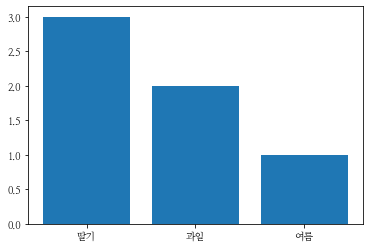

In [23]:
#bar 그래프 연습
wordinfo_sample = Counter({'여름':1, '과일':2, '딸기':3})
sorted_keys_sample = sorted(wordinfo_sample, key=wordinfo_sample.get, reverse=True)
sorted_values_sample = sorted(wordinfo_sample.values(), reverse=True)

import matplotlib.pyplot as plt
plt.bar(range(len(wordinfo_sample)), sorted_values_sample)  #x축의 위치, 각 x의 높이
plt.xticks(range(len(wordinfo_sample)), sorted_keys_sample)  #X축의 위치, 각 X의 라벨
plt.show()

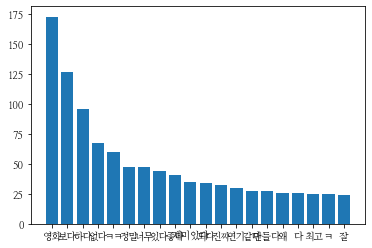

In [24]:
#그래프 그리기, 앞에서 20개만 출력
sorted_keys = sorted(wordinfo, key=wordinfo.get, reverse=True)
sorted_values = sorted(wordinfo.values(), reverse=True)

import matplotlib.pyplot as plt
plt.bar(range(20), sorted_values[:20])
plt.xticks(range(20),sorted_keys[:20])
plt.show()

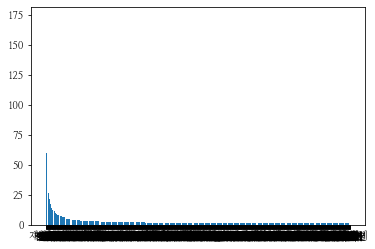

In [25]:
#전체 데이터 그래프
sorted_keys = sorted(wordinfo, key=wordinfo.get, reverse=True)
sorted_values = sorted(wordinfo.values(), reverse=True)

import matplotlib.pyplot as plt
plt.bar(range(len(wordinfo)), sorted_values)
plt.xticks(range(len(wordinfo)),sorted_keys)

plt.show()
#항목이 너무 많아 제대로 나타나지 않음

In [26]:
#Word Cloud
#data_txt는 각 문장을 리스트 원소로 담고있음.
#각 문장 리스트 원소는 공백으로 분리되어 있다. 각 문장은 join으로 연결한다.

print(data_txt)

['디자인 배우다 학생 외국 디자이너 일구다 전통 통하다 발전 문화 산업 부럽다 사실 우리나라 그 어렵다 시절 끝 열정 지키다 노라노 같다 전통 있다 같다 사람 꿈 꾸다 이루다 나가다 있다 감사', '폴리스스토리 시리즈 뉴 없다 최고', '와 연기 진짜 쩔다 지루 생각하다 몰입 그래 이런 진짜 영화', '안개 자욱 하다 밤하늘 뜨다 초승달 같다 영화', '사랑 해보다 사람 처음 끝 웃다 있다 영화', '완전 감동 다시다 감동', '개들 전쟁 나오다 나오다 1빠 보다', '굿', '바보 병', '나이 같다 영화 지금 보다 감동적 하지만 훗날 다시 보다 대사 하나하나 그 감정 완벽 하다 이해하다 같다', '재미있다', '고질라 무 귀엽다 ㅋㅋ', '영화 오페라 작품 극단적 평 갈리다 어쩌다 없다', '반전 좋다 ^^', '평점 왜 낮다 긴장감 스릴감 진짜 최고 진짜 전장 느끼다 공포 생생 전하다', '네고시에이터 소재 같다 아무런 관련 없다', '단연 최고', '가다 갈수록 더욱 빠지다 밀회 화이팅', '어 생각 없이 보다 상당 하다 수작 일본 영화 최고 마음 강렬 임팩트 일품', '오랜만 보다 제대로 되다 범죄 스릴러', '그런 때가다 있다 사랑하다 도 그저 좋아하다 마디 말 꺼내다 벅차다 밤 잠 설치다 때 교복 남다 션 자 볼펜 자국 역시 미처 다 전하다 못하다 마음 형태', '마지막 씬 잊다 없다', '강압적 용서 세뇌 용서 대하다 비판', '중세 시대 명작 굿 평점 왜 이러하다', '시간 영상 존재 죽기 전 꼭 한번 보다 아름답다 슬프다 제니퍼 코넬리 눈부시다 아역 시절 로버트 드니로 마지막 웃다 장면 정말 가슴속 영원히 기억 되다 최고 명작', '사람 어떻하다 저런 짓 하다 있다 는지 ㅡㅡ 보다 다 화나다', '인간 잠재 되다 악마 여러 시간 공간 속 존속 이 다큐 엉뚱 광적 재현', '최고 일 동안 쉬다 틈틈이 잠 줄이다 여운 남다', '실화 더욱 충격 다시 일어나다 서다 안되다 경각심 일깨우다 영화', '존 그라다 샴 작품 한 보다 가치 있다', '농

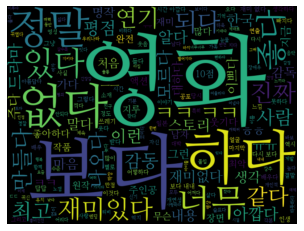

In [27]:
!pip install wordcloud
from wordcloud import WordCloud

cloud=WordCloud(font_path=fontpath, width=800, height=600).generate(' '.join(data_txt))
plt.imshow(cloud, interpolation='bilinear')  #글자를 더 부드럽게 나오게 한다.
plt.axis('off')
plt.show()

In [28]:
#워드 클라우드에 마스크를 적용해본다
#1. 먼저 mask 파일이 있는 경로를 확보한다
import os
d = os.getcwd()
print(d)

/content/gdrive/My Drive/pytest


In [29]:
#2.alice.png를 RGB값으로 읽기
import numpy as np
from PIL import Image
from os import path
alice_mask=np.array(Image.open(path.join(d,"alice.png")))

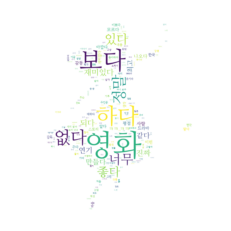

In [30]:
#e.워드 클라우드에 mask적용
cloud=WordCloud(font_path=fontpath, width=800, height=600, background_color='white',mask=alice_mask).generate(' '.join(data_txt))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()